# Modeling: Initial
Herein is my first attempt at creating a multi-ouput regression neural network.
I have learned much from [this article by Jason Brownlee on the subject](https://machinelearningmastery.com/deep-learning-models-for-multi-output-regression/), which was linked to me by my DSI-830 instructor Patrick Waled-Dinian

Plan:
* Import numpy arrays X and y 
* Create train-test split
* Assemble a Convolutional Neural Network
* Fit and assess CNN

In [45]:
## Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.metrics import MAE

In [2]:
## Constants
X_FILE = '../data/X.npy'
Y_FILE = '../data/y.npy'

## Data

### Load Datasets

In [3]:
## Load the datasets
X = np.load(X_FILE)
y = np.load(Y_FILE)

### Create Train/Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Model

### Create Framework

In [9]:
## Lesson 8.03
model = Sequential()
model.add(Flatten(input_shape=(32,32,1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='linear'))

### Compile

In [30]:
model.compile(loss='mse', optimizer='adam', metrics=[MAE])

### Fit

In [16]:
X_train[0].shape

(32, 32, 1)

In [31]:
results = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)

In [40]:
results.history['loss'][-1]

0.007725303992629051

In [41]:
results.history['mean_absolute_error'][-1]

0.05368427187204361

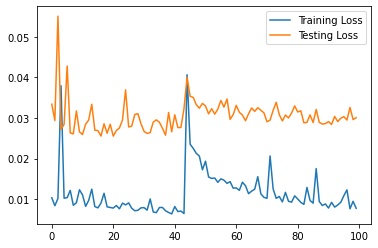

In [34]:
plt.plot(results.history['loss'], label = 'Training Loss')
plt.plot(results.history['val_loss'], label = 'Testing Loss')
plt.legend();

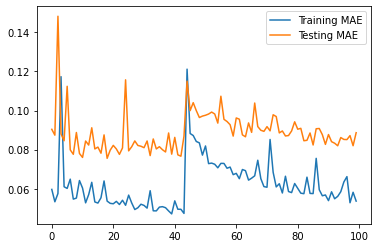

In [36]:
plt.plot(results.history['mean_absolute_error'], label = 'Training MAE')
plt.plot(results.history['val_mean_absolute_error'], label = 'Testing MAE')
plt.legend();

In [42]:
preds = model.predict(X_test)

In [43]:
preds

array([[-4.1928962e-02,  9.9916518e-01],
       [ 5.8316058e-01,  6.0222936e-01],
       [ 2.7931356e-01,  9.8876679e-01],
       ...,
       [ 2.0054981e-02, -2.4943113e-02],
       [-9.3524158e-04,  9.9004924e-01],
       [ 2.4048899e-01,  9.8761523e-01]], dtype=float32)

## Save model

### TODO: hardcoded

In [44]:
model.save('../models/model')

INFO:tensorflow:Assets written to: ../models/model/assets


In [46]:
test = tf.keras.models.load_model('../models/model')
test

In [53]:
X_test[0].shape

(32, 32, 1)

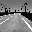

In [57]:
tf.keras.utils.array_to_img(X_test[0])

In [59]:
test_input = X_test[0].reshape((1,) + X_test[0].shape)

In [60]:
test_output = model.predict(test_input)

In [61]:
type(test_output)

numpy.ndarray

In [65]:
test_output[0][1]

0.99916506